# Exploring Trends Between Global temperature and Philadelphia temperature

<a id='Introduction'></a>
## Introduction
The following project is the first project of Udacity: Data Analyst Nanodegree. Udacity is the data sIn this project, I will walk through how I access, clean, visualize, and analyze the dataset containing global temperature and the temperature of Philadelphia. I will be calculating the moving averages to observe trends in the temperature and the correlation coeffient to see if there's any relationship between the global temperature and the Philadelphia temperature. 

## Observation of temperature trend

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Create dataframe of Philadelphia's and global's yearly avg. temp.
phillydf = pd.read_sql("""
            SELECT ct.year, ct.avg_temp AS city_avg_temp, gl.avg_temp AS global_avg_temp
            FROM city_data AS ct
            LEFT JOIN global_data AS gl
                ON ct.year = gl.year
            WHERE ct.city = 'Philadelphia'
            ORDER BY ct.year""", con = credentials)
phillydf.head()

,year,city_avg_temp,global_avg_temp
0,1743,6.07,NaN
1,1744,13.74,NaN
2,1745,3.96,NaN
3,1746,NaN,NaN
4,1747,NaN,NaN


In [6]:
phillydf.describe()

,year,city_avg_temp,global_avg_temp
count,271.000000,266.000000,264.000000
mean,1878.000000,11.779173,8.359394
std,78.375166,1.178994,0.575184
min,1743.000000,3.450000,5.780000
25%,1810.500000,11.382500,8.077500
50%,1878.000000,11.860000,8.365000
75%,1945.500000,12.385000,8.700000
max,2013.000000,14.050000,9.730000


In [7]:
phillydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             271 non-null    int64  
 1   city_avg_temp    266 non-null    float64
 2   global_avg_temp  264 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.5 KB


## Clean data
Null value is not just in Philly. It is also in New York. So it's not that random

In [8]:
# Remove NaN rows from global_avg_temp column since it has minimal impact on the dataset city and global temperature mean and distribution
phillydf.dropna(subset=['global_avg_temp'], inplace = True)

In [9]:
# Replace last NaN with interpolation since it has the smallest difference between the mean and std from the original
phillydf.interpolate(method='linear', inplace=True)

In [10]:
phillydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 7 to 270
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             264 non-null    int64  
 1   city_avg_temp    264 non-null    float64
 2   global_avg_temp  264 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.2 KB


In [11]:
# Reset index
phillydf.reset_index(drop=True, inplace=True)

## Create moving average
Have verified in Excel that moving avg calc is correct

### City temperature moving average

In [12]:
city_moving_avg = []
for counter in range(len(phillydf.loc[49:,:])):
    city_moving_avg.append(phillydf.loc[counter:(49 + counter),'city_avg_temp'].mean())

### Global temperature moving average

In [13]:
global_moving_avg = []
for counter in range(len(phillydf.loc[49:,:])):
    global_moving_avg.append(phillydf.loc[counter:(49 + counter),'global_avg_temp'].mean())

In [14]:
# Create 50 years moving average df
moving_avg = pd.DataFrame()
moving_avg['year'] = phillydf.loc[49:,'year']
moving_avg['city_moving_avg_temp'] = city_moving_avg
moving_avg['global_moving_avg_temp'] = global_moving_avg

In [15]:
moving_avg.head()

,year,city_moving_avg_temp,global_moving_avg_temp
49,1799,11.1780,8.1774
50,1800,11.1670,8.1726
51,1801,11.1504,8.1848
52,1802,11.2884,8.2408
53,1803,11.2998,8.2430


## Plot moving average

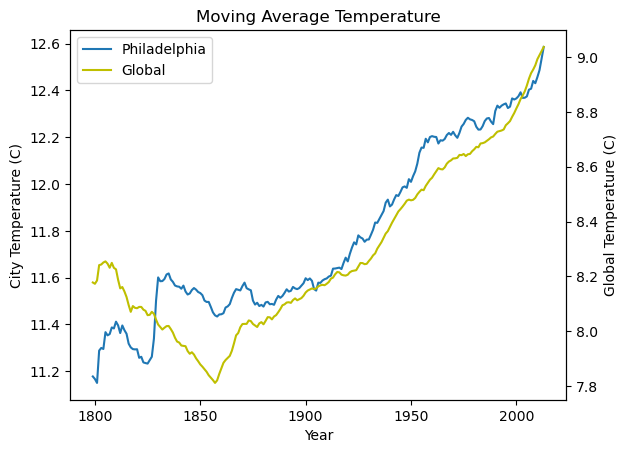

In [23]:
# Reference on how to create secondary y-axis plot: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
# Create a figure of 1x1 subplot
fig, ax1 = plt.subplots()
# Overlap global plot on top of city's
ax2 = ax1.twinx()

# Create line plot of city moving average temperature
cityplt = ax1.plot(moving_avg['year'], moving_avg['city_moving_avg_temp'])
globalplt = ax2.plot(moving_avg['year'], moving_avg['global_moving_avg_temp'], color='y')

# Add axis labels
ax1.set_xlabel('Year')
ax1.set_ylabel('City Temperature (C)')
ax2.set_ylabel('Global Temperature (C)')

# Add plot title
plt.title("Moving Average Temperature")

# Add legend
# Reference on how to add legend to secondary axis plot: https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
plt.legend(cityplt+globalplt,['Philadelphia','Global'])

# Remove all text above the plot
plt.show()

### Correlation Coefficient

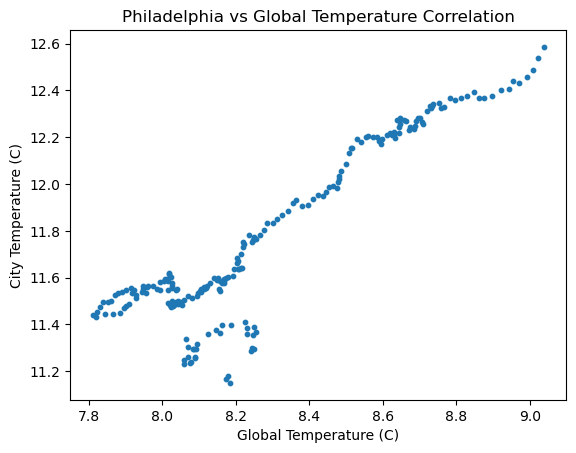

In [26]:
# Create scatter plot to visualize correlation between Philadelpia's temperature and global temperature
plt.scatter(moving_avg['global_moving_avg_temp'],moving_avg['city_moving_avg_temp'], s=10)

# Add axis labels
plt.xlabel('Global Temperature (C)')
plt.ylabel('City Temperature (C)')

# Add plot title
plt.title('Philadelphia vs Global Temperature Correlation')

# Remove all text above the plot
plt.show()

In [27]:
np.corrcoef(moving_avg['global_moving_avg_temp'],moving_avg['city_moving_avg_temp'])

array([[1.        , 0.91479127],
       [0.91479127, 1.        ]])